# Import necessary dependencies

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy.linalg import eigh
from sklearn import svm
import math 
%matplotlib inline

# Load  dataset

In [2]:
X = pd.read_csv('angles_cycles_frames_10t_08f_anglesZX_27persons.csv', sep = ',',  header=None)
m,n = X.shape
X.head()


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1,1,1.11890,5.9625,-1.32660,4.18010,-6.7437,10.5720,21.662,-11.8490,...,8.5297,-8.1733,-2.2362,9.3154,-6.1047,2.1698,-1.74980,9.7499,21.721,-10.2310
1,1,1,0.30187,5.8790,1.55890,2.09410,-4.2518,11.5630,18.993,-11.5190,...,12.0080,-10.4680,-3.4967,7.8287,-5.7013,2.5601,-4.83690,8.3991,24.497,-9.9568
2,1,1,-1.85210,7.4774,-5.62520,-0.41320,-8.4559,7.8868,28.164,-9.2627,...,-15.3080,-9.6853,6.5100,7.6997,6.7367,3.6727,14.53700,13.4250,-12.128,-10.1090
3,1,1,-0.14136,7.4573,-0.51639,0.47907,-4.2468,10.4690,23.043,-10.4920,...,5.2178,-8.9348,-3.1342,8.3177,-1.8904,2.9814,0.01881,9.5201,20.141,-10.5440
4,1,1,5.09610,6.3257,5.66740,1.46760,-4.3762,12.2750,22.928,-13.3670,...,9.3466,-7.2465,-2.3816,8.3843,-1.7596,1.5682,-2.21900,8.8635,22.300,-8.9909


# SVM algorithm

In [3]:
# prepare the data 
from data_utils_modified import loadfromfolder,Random_Selection_train_test, Selection_train_test # data division

from cs231n.classifiers import Softmax


In [6]:
# divide data for train and test (same person cannot be in the same dataset part)

persons_testing = np.array([1, 9, 15, 18, 20, 21, 23,  25]) # specify which persons can be used for test
X_train_all, Y_train_all, X_test, y_test = Selection_train_test(X.values, persons_testing)

Persons for train: 
[  2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.  16.  17.  19.
  22.  24.  26.  27.]
Persons for test: 
[ 1  9 15 18 20 21 23 25]


In [5]:
# randomly select the validation data
X_train, y_train, X_val, y_val, returned_train = Random_Selection_train_test (X_train_all, 13)

Persons for train: 
[  2.   3.   5.   6.   7.  10.  11.  14.  19.  22.  24.  26.  27.]
Persons for test: 
[  4.   8.  12.  13.  16.  17.]


In [5]:
X_train = X_train[:,2:]
X_val = X_val[:,2:]
X_test =X_test[:,2:]
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

NameError: name 'X_train' is not defined

In [7]:
# my dataset shape
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(686, 82)
(328, 80)
(328,)
(148, 80)
(148,)
(210, 80)
(210,)


In [54]:
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 4e-7]
regularization_strengths = [1.5e4, 5e4]
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
num_iterations = 10
regularization_strengths_update = (regularization_strengths[1]-regularization_strengths[0])/num_iterations
learning_rate_update = (learning_rates[1]-learning_rates[0])/num_iterations
learning_rate = learning_rates[0]
#regularization_strengh = regularization_strengths[0]
for i in range (0,num_iterations):
    regularization_strengh = regularization_strengths[0]
    for j in range (0,num_iterations):
        svm = Softmax()
        loss_hist = svm.train(X_train, y_train, learning_rate, regularization_strengh,
                      num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[learning_rate, regularization_strengh] = (training_accuracy, validation_accuracy)
        regularization_strengh += regularization_strengths_update
    learning_rate -= learning_rate_update
    if  (validation_accuracy > best_val):
         best_val = validation_accuracy
         best_softmax = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

80
4
iteration 0 / 1500: loss 3.990434
iteration 100 / 1500: loss 3.299495
iteration 200 / 1500: loss 2.788290
iteration 300 / 1500: loss 2.419833
iteration 400 / 1500: loss 2.136589
iteration 500 / 1500: loss 1.929542
iteration 600 / 1500: loss 1.778275
iteration 700 / 1500: loss 1.664998
iteration 800 / 1500: loss 1.581196
iteration 900 / 1500: loss 1.521862
iteration 1000 / 1500: loss 1.477790
iteration 1100 / 1500: loss 1.441980
iteration 1200 / 1500: loss 1.418588
iteration 1300 / 1500: loss 1.398089
iteration 1400 / 1500: loss 1.387415
80
4
iteration 0 / 1500: loss 4.541254
iteration 100 / 1500: loss 3.569487
iteration 200 / 1500: loss 2.871700
iteration 300 / 1500: loss 2.401856
iteration 400 / 1500: loss 2.074236
iteration 500 / 1500: loss 1.853655
iteration 600 / 1500: loss 1.699607
iteration 700 / 1500: loss 1.591597
iteration 800 / 1500: loss 1.516975
iteration 900 / 1500: loss 1.468409
iteration 1000 / 1500: loss 1.430938
iteration 1100 / 1500: loss 1.408697
iteration 1200 

iteration 100 / 1500: loss 4.401596
iteration 200 / 1500: loss 3.283198
iteration 300 / 1500: loss 2.574181
iteration 400 / 1500: loss 2.125957
iteration 500 / 1500: loss 1.857203
iteration 600 / 1500: loss 1.674942
iteration 700 / 1500: loss 1.557468
iteration 800 / 1500: loss 1.491160
iteration 900 / 1500: loss 1.446465
iteration 1000 / 1500: loss 1.416324
iteration 1100 / 1500: loss 1.398215
iteration 1200 / 1500: loss 1.385939
iteration 1300 / 1500: loss 1.379925
iteration 1400 / 1500: loss 1.374618
80
4
iteration 0 / 1500: loss 6.670345
iteration 100 / 1500: loss 4.572441
iteration 200 / 1500: loss 3.303928
iteration 300 / 1500: loss 2.530149
iteration 400 / 1500: loss 2.074002
iteration 500 / 1500: loss 1.794960
iteration 600 / 1500: loss 1.621140
iteration 700 / 1500: loss 1.521211
iteration 800 / 1500: loss 1.462373
iteration 900 / 1500: loss 1.424461
iteration 1000 / 1500: loss 1.402964
iteration 1100 / 1500: loss 1.388503
iteration 1200 / 1500: loss 1.381486
iteration 1300 / 

iteration 300 / 1500: loss 3.563354
iteration 400 / 1500: loss 3.494872
iteration 500 / 1500: loss 3.436129
iteration 600 / 1500: loss 3.369740
iteration 700 / 1500: loss 3.303696
iteration 800 / 1500: loss 3.248671
iteration 900 / 1500: loss 3.190042
iteration 1000 / 1500: loss 3.135016
iteration 1100 / 1500: loss 3.090538
iteration 1200 / 1500: loss 3.038561
iteration 1300 / 1500: loss 2.981049
iteration 1400 / 1500: loss 2.934701
80
4
iteration 0 / 1500: loss 4.453550
iteration 100 / 1500: loss 4.341973
iteration 200 / 1500: loss 4.230806
iteration 300 / 1500: loss 4.132797
iteration 400 / 1500: loss 4.029935
iteration 500 / 1500: loss 3.930029
iteration 600 / 1500: loss 3.839313
iteration 700 / 1500: loss 3.740189
iteration 800 / 1500: loss 3.658634
iteration 900 / 1500: loss 3.580411
iteration 1000 / 1500: loss 3.494950
iteration 1100 / 1500: loss 3.423742
iteration 1200 / 1500: loss 3.349182
iteration 1300 / 1500: loss 3.268033
iteration 1400 / 1500: loss 3.199272
80
4
iteration 

iteration 200 / 1500: loss 8.486546
iteration 300 / 1500: loss 9.487019
iteration 400 / 1500: loss 10.614087
iteration 500 / 1500: loss 11.914964
iteration 600 / 1500: loss 13.387281
iteration 700 / 1500: loss 15.071163
iteration 800 / 1500: loss 16.976656
iteration 900 / 1500: loss 19.124950
iteration 1000 / 1500: loss 21.591103
iteration 1100 / 1500: loss 24.398483
iteration 1200 / 1500: loss 27.624527
iteration 1300 / 1500: loss 31.229498
iteration 1400 / 1500: loss 35.371087
80
4
iteration 0 / 1500: loss 7.064142
iteration 100 / 1500: loss 7.944526
iteration 200 / 1500: loss 8.950317
iteration 300 / 1500: loss 10.140377
iteration 400 / 1500: loss 11.501829
iteration 500 / 1500: loss 13.054566
iteration 600 / 1500: loss 14.889375
iteration 700 / 1500: loss 16.980968
iteration 800 / 1500: loss 19.384003
iteration 900 / 1500: loss 22.165728
iteration 1000 / 1500: loss 25.416801
iteration 1100 / 1500: loss 29.153347
iteration 1200 / 1500: loss 33.419079
iteration 1300 / 1500: loss 38.3

iteration 1100 / 1500: loss 1176.022076
iteration 1200 / 1500: loss 1871.055734
iteration 1300 / 1500: loss 2977.085402
iteration 1400 / 1500: loss 4737.109244
80
4
iteration 0 / 1500: loss 4.045357
iteration 100 / 1500: loss 4.761381
iteration 200 / 1500: loss 5.693082
iteration 300 / 1500: loss 6.870970
iteration 400 / 1500: loss 8.398051
iteration 500 / 1500: loss 10.314834
iteration 600 / 1500: loss 12.757649
iteration 700 / 1500: loss 15.848171
iteration 800 / 1500: loss 19.791393
iteration 900 / 1500: loss 24.806342
iteration 1000 / 1500: loss 31.258125
iteration 1100 / 1500: loss 39.325891
iteration 1200 / 1500: loss 49.713965
iteration 1300 / 1500: loss 62.973414
iteration 1400 / 1500: loss 79.707315
80
4
iteration 0 / 1500: loss 4.651682
iteration 100 / 1500: loss 5.779315
iteration 200 / 1500: loss 7.314298
iteration 300 / 1500: loss 9.382985
iteration 400 / 1500: loss 12.165191
iteration 500 / 1500: loss 15.878088
iteration 600 / 1500: loss 20.932139
iteration 700 / 1500: lo

iteration 500 / 1500: loss 115.629610
iteration 600 / 1500: loss 217.899693
iteration 700 / 1500: loss 411.723956
iteration 800 / 1500: loss 778.208768
iteration 900 / 1500: loss 1471.308593
iteration 1000 / 1500: loss 2782.203397
iteration 1100 / 1500: loss 5260.624184
iteration 1200 / 1500: loss 9946.649891
iteration 1300 / 1500: loss 18807.174877
iteration 1400 / 1500: loss 35560.450995
80
4
iteration 0 / 1500: loss 6.734756
iteration 100 / 1500: loss 12.343795
iteration 200 / 1500: loss 23.797832
iteration 300 / 1500: loss 47.190403
iteration 400 / 1500: loss 95.005088
iteration 500 / 1500: loss 192.701457
iteration 600 / 1500: loss 392.066009
iteration 700 / 1500: loss 799.455341
iteration 800 / 1500: loss 1631.055540
iteration 900 / 1500: loss 3329.294905
iteration 1000 / 1500: loss 6796.704609
iteration 1100 / 1500: loss 13874.920189
iteration 1200 / 1500: loss 28327.754766
iteration 1300 / 1500: loss 57831.787974
iteration 1400 / 1500: loss 118069.383842
80
4
iteration 0 / 1500

M:\python_general\practical-machine-learning-with-python-master\bonus content\effective data visualization\test_svm\cs231n\classifiers\softmax.py:89: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(scores_norm[np.arange(num_train),y]))


iteration 200 / 1500: loss 61.589468
iteration 300 / 1500: loss 168.711308
iteration 400 / 1500: loss 465.763538
iteration 500 / 1500: loss 1291.290521
iteration 600 / 1500: loss 3581.332709
iteration 700 / 1500: loss 9935.199466
iteration 800 / 1500: loss 27563.362837
iteration 900 / 1500: loss 76472.253396
iteration 1000 / 1500: loss 212150.596211
iteration 1100 / 1500: loss 588569.660542
iteration 1200 / 1500: loss 1632842.337319
iteration 1300 / 1500: loss 4529968.864710
iteration 1400 / 1500: loss 12567460.752790
80
4
iteration 0 / 1500: loss 3.778369
iteration 100 / 1500: loss 5.060012
iteration 200 / 1500: loss 7.026097
iteration 300 / 1500: loss 10.036628
iteration 400 / 1500: loss 14.651381
iteration 500 / 1500: loss 21.791852
iteration 600 / 1500: loss 32.725903
iteration 700 / 1500: loss 49.550542
iteration 800 / 1500: loss 75.320612
iteration 900 / 1500: loss 114.676371
iteration 1000 / 1500: loss 174.621732
iteration 1100 / 1500: loss 265.886339
iteration 1200 / 1500: loss

iteration 400 / 1500: loss 134.043822
iteration 500 / 1500: loss 317.351007
iteration 600 / 1500: loss 754.277174
iteration 700 / 1500: loss 1791.429802
iteration 800 / 1500: loss 4255.976959
iteration 900 / 1500: loss 10110.820141
iteration 1000 / 1500: loss 24015.836366
iteration 1100 / 1500: loss 57043.868761
iteration 1200 / 1500: loss 135497.632650
iteration 1300 / 1500: loss 321839.298073
iteration 1400 / 1500: loss 764485.749088
80
4
iteration 0 / 1500: loss 5.844951
iteration 100 / 1500: loss 13.376236
iteration 200 / 1500: loss 33.581912
iteration 300 / 1500: loss 87.897450
iteration 400 / 1500: loss 233.506103
iteration 500 / 1500: loss 623.745664
iteration 600 / 1500: loss 1668.078096
iteration 700 / 1500: loss 4460.697964
iteration 800 / 1500: loss 11929.373864
iteration 900 / 1500: loss 31899.491813
iteration 1000 / 1500: loss 85300.166223
iteration 1100 / 1500: loss 228092.922527
iteration 1200 / 1500: loss 609921.518891
iteration 1300 / 1500: loss 1630935.134582
iteratio

In [53]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.357143


In [8]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)




In [4]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='poly', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=5) # cross-fold -> balansed  
scores                                              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


NameError: name 'X_train' is not defined

Search for parameters

In [7]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_all)
X_test = scaler.transform(X_test) 
y_train =  Y_train_all



In [27]:
persons_testing = np.array([1, 9, 15, 18, 20, 21, 23,  25]) # specify which persons can be used for test
X_train_all, Y_train_all, X_test, y_test = Selection_train_test(X.values, persons_testing)
X_train, Y_train, X_val, Y_val, returned_train = Random_Selection_train_test (X_train_all, 13)
print(X_train.shape)
print(X_val.shape)
print(X_train)

Persons for train: 
[  2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.  16.  17.  19.
  22.  24.  26.  27.]
Persons for test: 
[ 1  9 15 18 20 21 23 25]
Persons for train: 
[  2.   3.   5.   6.   7.  10.  12.  13.  17.  19.  22.  24.  27.]
Persons for test: 
[  4.   8.  11.  14.  16.  26.]
(330, 82)
(146, 82)
[[  1.        3.       -0.68481 ...,   6.893    28.569   -17.078  ]
 [  1.        3.        4.0623  ...,   6.3502   25.955   -15.667  ]
 [  1.        3.        0.85096 ...,   8.4362   26.766   -16.324  ]
 ..., 
 [  3.       10.        2.8753  ...,   8.3802   19.262    -9.2919 ]
 [  3.       10.        6.7319  ...,  10.363    29.253    -9.811  ]
 [  3.       10.        3.841   ...,   8.5146   30.578    -9.3161 ]]


In [31]:
def process_and_normalize(data, scaler, train = True):
    data = data[:,2:]
    if train:
        data_normalized = scaler.fit_transform(data)
    else:
        data_normalized = scaler.transform(data) 
    return scaler, data_normalized

In [33]:

# Number of random trials
NUM_TRIALS =5

# Set up possible values of parameters to optimize over
p_grid = {"C": np.logspace(-2, 10, 13),
          "degree": np.arange(1,20)}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="poly", probability=True)

best_SVM = None
best_score = 0

scores = np.zeros(NUM_TRIALS)
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# initial division
persons_testing = np.array([1, 9, 15, 18, 20, 21, 23,  25]) # specify which persons can be used for test
X_train_all, Y_train_all, X_test, y_test = Selection_train_test(X.values, persons_testing)


# Loop for each trial
for i in range(NUM_TRIALS):
    X_train, Y_train, X_val, Y_val, returned_train = Random_Selection_train_test (X_train_all, 13)
    scaler = StandardScaler()
    scaler, X_train = process_and_normalize(X_train, scaler, train = True)
    scaler, X_val = process_and_normalize(X_val, scaler, train = False)
    print(X_train.shape, X_val.shape)
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2)
    clf.fit(X_train, Y_train)
    
    y_val_pred = clf.predict(X_val)
    print(clf.best_params_)
    scores[i] = np.mean(Y_val == y_val_pred)

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(scores.mean(), scores.std()))

Persons for train: 
[  2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.  16.  17.  19.
  22.  24.  26.  27.]
Persons for test: 
[ 1  9 15 18 20 21 23 25]
Persons for train: 
[  3.   5.   6.   7.   8.  10.  11.  12.  16.  22.  24.  26.  27.]
Persons for test: 
[  2.   4.  13.  14.  17.  19.]
(320, 80) (156, 80)
Fitting 4 folds for each of 247 candidates, totalling 988 fits
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.362500, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.350000, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.337500, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.437500, total=   0.0s
[CV] C=0.01, degree=2 ..........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ................. C=0.01, degree=2, score=0.362500, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.350000, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.337500, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.425000, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.362500, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.350000, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.337500, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .

[CV] ................ C=0.01, degree=16, score=0.387500, total=   0.0s
[CV] C=0.01, degree=16 ...............................................
[CV] ................ C=0.01, degree=16, score=0.462500, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.375000, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.362500, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.375000, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.462500, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.375000, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] .

[CV] ................. C=0.1, degree=13, score=0.362500, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.387500, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.400000, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.475000, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.375000, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.400000, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.387500, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] .

[CV] .................. C=1.0, degree=9, score=0.450000, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.487500, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.525000, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.537500, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.437500, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.462500, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.525000, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] .

[CV] ................. C=10.0, degree=5, score=0.925000, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.800000, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.887500, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.650000, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.825000, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.587500, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.775000, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] .

[CV] ................ C=100.0, degree=1, score=0.850000, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.825000, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.837500, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.737500, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.812500, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.862500, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.912500, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] .

[CV] ............... C=100.0, degree=17, score=0.425000, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.525000, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.462500, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.500000, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.425000, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.512500, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.475000, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] .

[CV] .............. C=1000.0, degree=13, score=0.650000, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.550000, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.575000, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.537500, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.587500, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.475000, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.562500, total=   0.0s
[CV] C=1000.0, degree=15 .............................................
[CV] .

[CV] .............. C=10000.0, degree=8, score=0.637500, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.725000, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.825000, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.687500, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.712500, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] ............. C=10000.0, degree=10, score=0.625000, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] ............. C=10000.0, degree=10, score=0.700000, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] .

[CV] ............. C=100000.0, degree=5, score=0.862500, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.725000, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.875000, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.787500, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.775000, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.612500, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.687500, total=   0.0s
[CV] C=100000.0, degree=7 ............................................
[CV] .

[CV] ............ C=100000.0, degree=19, score=0.500000, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.862500, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.862500, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.862500, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.862500, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.825000, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.837500, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] .

[CV] ........... C=1000000.0, degree=16, score=0.512500, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.625000, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.450000, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.525000, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.475000, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.675000, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.525000, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] .

[CV] .......... C=10000000.0, degree=11, score=0.650000, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.650000, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.625000, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.500000, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.600000, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.625000, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.650000, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .

[CV] .......... C=100000000.0, degree=7, score=0.837500, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.650000, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.725000, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.775000, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.737500, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.550000, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.612500, total=   0.0s
[CV] C=100000000.0, degree=9 .........................................
[CV] .

[CV] ......... C=1000000000.0, degree=3, score=0.937500, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.825000, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.862500, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.737500, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.875000, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.800000, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.862500, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] .

[CV] ........ C=1000000000.0, degree=18, score=0.450000, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.525000, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.512500, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.662500, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.487500, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.550000, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] ........ C=10000000000.0, degree=1, score=0.862500, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] .

[CV] ....... C=10000000000.0, degree=14, score=0.500000, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.562500, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.600000, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.600000, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.500000, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.587500, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] ....... C=10000000000.0, degree=16, score=0.562500, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 988 out of 988 | elapsed:   47.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.01, degree=1, score=0.390244, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.407407, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.308642, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.390244, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.390244, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.370370, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.308642, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .

[CV] ................ C=0.01, degree=16, score=0.432099, total=   0.0s
[CV] C=0.01, degree=16 ...............................................
[CV] ................ C=0.01, degree=16, score=0.333333, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.402439, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.463415, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.419753, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.345679, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.414634, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] .

[CV] ................. C=0.1, degree=12, score=0.407407, total=   0.0s
[CV] C=0.1, degree=12 ................................................
[CV] ................. C=0.1, degree=12, score=0.382716, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.426829, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.451220, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.419753, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.370370, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.439024, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] .

[CV] .................. C=1.0, degree=8, score=0.481481, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.463415, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.512195, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.506173, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.481481, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.463415, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.536585, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] .

[CV] ................. C=10.0, degree=5, score=0.707317, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.864198, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.654321, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.768293, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.573171, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.777778, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.629630, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] .

[CV] ................ C=100.0, degree=2, score=0.853659, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.780488, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.839506, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.777778, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.939024, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.914634, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.950617, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] .

[CV] ............... C=100.0, degree=16, score=0.469136, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.407407, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.451220, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.487805, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.469136, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.432099, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.463415, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] .

[CV] .............. C=1000.0, degree=12, score=0.567901, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.567901, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.560976, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.646341, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.617284, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.530864, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.536585, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .

[CV] .............. C=10000.0, degree=8, score=0.560976, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.597561, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.703704, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.629630, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.646341, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.768293, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.777778, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .

[CV] ............. C=100000.0, degree=4, score=0.841463, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.707317, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.876543, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.691358, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.829268, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.829268, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.864198, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] .

[CV] ............ C=100000.0, degree=19, score=0.524390, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.463415, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.555556, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.469136, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.914634, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.841463, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.950617, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] .

[CV] ........... C=1000000.0, degree=15, score=0.585366, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.691358, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.543210, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.524390, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.560976, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.592593, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.518519, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] .

[CV] .......... C=10000000.0, degree=11, score=0.634146, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.658537, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.740741, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.555556, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.548780, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.536585, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.654321, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .

[CV] .......... C=100000000.0, degree=6, score=0.629630, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.719512, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.731707, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.802469, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.666667, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.646341, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.634146, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .

[CV] ......... C=1000000000.0, degree=2, score=0.780488, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.839506, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.777778, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.939024, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.914634, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.950617, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.864198, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] .

[CV] ........ C=1000000000.0, degree=17, score=0.666667, total=   0.0s
[CV] C=1000000000.0, degree=17 .......................................
[CV] ........ C=1000000000.0, degree=17, score=0.580247, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.536585, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.512195, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.567901, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.641975, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.573171, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] .

[CV] ....... C=10000000000.0, degree=13, score=0.597561, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.585366, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.691358, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.555556, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.548780, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.524390, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.629630, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 988 out of 988 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.01, degree=1, score=0.378049, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.268293, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.378049, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.304878, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.378049, total=   0.0s
[CV] C=0.01, degree=3 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ................. C=0.01, degree=3, score=0.292683, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.378049, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.304878, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.378049, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] ................. C=0.01, degree=4, score=0.280488, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] ................. C=0.01, degree=4, score=0.378049, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] ................. C=0.01, degree=4, score=0.304878, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] .

[CV] ................ C=0.01, degree=18, score=0.390244, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.353659, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.390244, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] ................ C=0.01, degree=19, score=0.317073, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] ................ C=0.01, degree=19, score=0.378049, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] ................ C=0.01, degree=19, score=0.353659, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] ................ C=0.01, degree=19, score=0.402439, total=   0.0s
[CV] C=0.1, degree=1 .................................................
[CV] .

[CV] ................. C=0.1, degree=14, score=0.378049, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.426829, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.317073, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.414634, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.378049, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.414634, total=   0.0s
[CV] C=0.1, degree=16 ................................................
[CV] ................. C=0.1, degree=16, score=0.329268, total=   0.0s
[CV] C=0.1, degree=16 ................................................
[CV] .

[CV] ................. C=1.0, degree=10, score=0.390244, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.329268, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.487805, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.463415, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] ................. C=1.0, degree=11, score=0.390244, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] ................. C=1.0, degree=11, score=0.304878, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] ................. C=1.0, degree=11, score=0.475610, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] .

[CV] ................. C=10.0, degree=6, score=0.597561, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.719512, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] ................. C=10.0, degree=7, score=0.597561, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] ................. C=10.0, degree=7, score=0.487805, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] ................. C=10.0, degree=7, score=0.560976, total=   0.0s
[CV] C=10.0, degree=7 ................................................
[CV] ................. C=10.0, degree=7, score=0.682927, total=   0.0s
[CV] C=10.0, degree=8 ................................................
[CV] ................. C=10.0, degree=8, score=0.524390, total=   0.0s
[CV] C=10.0, degree=8 ................................................
[CV] .

[CV] ................ C=100.0, degree=3, score=0.951220, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.878049, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.902439, total=   0.0s
[CV] C=100.0, degree=3 ...............................................
[CV] ................ C=100.0, degree=3, score=0.902439, total=   0.0s
[CV] C=100.0, degree=4 ...............................................
[CV] ................ C=100.0, degree=4, score=0.914634, total=   0.0s
[CV] C=100.0, degree=4 ...............................................
[CV] ................ C=100.0, degree=4, score=0.780488, total=   0.0s
[CV] C=100.0, degree=4 ...............................................
[CV] ................ C=100.0, degree=4, score=0.792683, total=   0.0s
[CV] C=100.0, degree=4 ...............................................
[CV] .

[CV] ............... C=100.0, degree=17, score=0.500000, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.536585, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.390244, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.292683, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.463415, total=   0.0s
[CV] C=100.0, degree=18 ..............................................
[CV] ............... C=100.0, degree=18, score=0.500000, total=   0.0s
[CV] C=100.0, degree=19 ..............................................
[CV] ............... C=100.0, degree=19, score=0.378049, total=   0.0s
[CV] C=100.0, degree=19 ..............................................
[CV] .

[CV] .............. C=1000.0, degree=13, score=0.536585, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.426829, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.524390, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.658537, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.512195, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.402439, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .............. C=1000.0, degree=14, score=0.487805, total=   0.0s
[CV] C=1000.0, degree=14 .............................................
[CV] .

[CV] .............. C=10000.0, degree=8, score=0.743902, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.658537, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.646341, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.646341, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.768293, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] ............. C=10000.0, degree=10, score=0.658537, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] ............. C=10000.0, degree=10, score=0.500000, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] .

[CV] ............. C=100000.0, degree=5, score=0.890244, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.768293, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.780488, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.890244, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.817073, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.573171, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] ............. C=100000.0, degree=6, score=0.682927, total=   0.0s
[CV] C=100000.0, degree=6 ............................................
[CV] .

[CV] ............ C=1000000.0, degree=1, score=0.853659, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.829268, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.841463, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.792683, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.792683, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] ............ C=1000000.0, degree=2, score=0.853659, total=   0.0s
[CV] C=1000000.0, degree=3 ...........................................
[CV] ............ C=1000000.0, degree=3, score=0.951220, total=   0.0s
[CV] C=1000000.0, degree=3 ...........................................
[CV] .

[CV] ........... C=1000000.0, degree=16, score=0.524390, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.573171, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.536585, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.719512, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.548780, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.634146, total=   0.0s
[CV] C=1000000.0, degree=18 ..........................................
[CV] ........... C=1000000.0, degree=18, score=0.524390, total=   0.0s
[CV] C=1000000.0, degree=18 ..........................................
[CV] .

[CV] .......... C=10000000.0, degree=12, score=0.463415, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.560976, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.731707, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.597561, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.621951, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.597561, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.646341, total=   0.0s
[CV] C=10000000.0, degree=14 .........................................
[CV] .

[CV] .......... C=100000000.0, degree=8, score=0.634146, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.634146, total=   0.0s
[CV] C=100000000.0, degree=9 .........................................
[CV] .......... C=100000000.0, degree=9, score=0.731707, total=   0.0s
[CV] C=100000000.0, degree=9 .........................................
[CV] .......... C=100000000.0, degree=9, score=0.573171, total=   0.0s
[CV] C=100000000.0, degree=9 .........................................
[CV] .......... C=100000000.0, degree=9, score=0.670732, total=   0.0s
[CV] C=100000000.0, degree=9 .........................................
[CV] .......... C=100000000.0, degree=9, score=0.707317, total=   0.0s
[CV] C=100000000.0, degree=10 ........................................
[CV] ......... C=100000000.0, degree=10, score=0.756098, total=   0.0s
[CV] C=100000000.0, degree=10 ........................................
[CV] .

[CV] ......... C=1000000000.0, degree=4, score=0.731707, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.780488, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.792683, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.890244, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.768293, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.780488, total=   0.0s
[CV] C=1000000000.0, degree=5 ........................................
[CV] ......... C=1000000000.0, degree=5, score=0.890244, total=   0.0s
[CV] C=1000000000.0, degree=6 ........................................
[CV] .

[CV] ........ C=1000000000.0, degree=19, score=0.573171, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.621951, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] ........ C=10000000000.0, degree=1, score=0.865854, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] ........ C=10000000000.0, degree=1, score=0.829268, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] ........ C=10000000000.0, degree=1, score=0.853659, total=   0.0s
[CV] C=10000000000.0, degree=1 .......................................
[CV] ........ C=10000000000.0, degree=1, score=0.829268, total=   0.0s
[CV] C=10000000000.0, degree=2 .......................................
[CV] ........ C=10000000000.0, degree=2, score=0.841463, total=   0.0s
[CV] C=10000000000.0, degree=2 .......................................
[CV] .

[CV] ....... C=10000000000.0, degree=15, score=0.682927, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.463415, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.597561, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.658537, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] ....... C=10000000000.0, degree=16, score=0.768293, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] ....... C=10000000000.0, degree=16, score=0.365854, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] ....... C=10000000000.0, degree=16, score=0.524390, total=   0.0s
[CV] C=10000000000.0, degree=16 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 988 out of 988 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


{'C': 1.0, 'degree': 1}
Persons for train: 
[  2.   5.   6.   7.  10.  11.  12.  13.  14.  16.  19.  24.  27.]
Persons for test: 
[  3.   4.   8.  17.  22.  26.]
(315, 80) (161, 80)
Fitting 4 folds for each of 247 candidates, totalling 988 fits
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.329114, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.316456, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.278481, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.333333, total=   0.0s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.329114, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.303797, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.278481, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.333333, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.329114, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.303797, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.278481, total=   0.0s
[CV] 

[CV] ................ C=0.01, degree=17, score=0.303797, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.384615, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.405063, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.367089, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.303797, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.397436, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] ................ C=0.01, degree=19, score=0.392405, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] .

[CV] ................. C=0.1, degree=13, score=0.435897, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.430380, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.341772, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.392405, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.448718, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.379747, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] ................. C=0.1, degree=15, score=0.341772, total=   0.0s
[CV] C=0.1, degree=15 ................................................
[CV] .

[CV] .................. C=1.0, degree=9, score=0.405063, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.430380, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.551282, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.468354, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.379747, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.430380, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.564103, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] .

[CV] ................. C=10.0, degree=4, score=0.820513, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.784810, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.848101, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.822785, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.756410, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.759494, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.544304, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] .

[CV] ................ C=10.0, degree=19, score=0.512821, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.911392, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.898734, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.848101, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.858974, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.886076, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.835443, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] .

[CV] ............... C=100.0, degree=15, score=0.455696, total=   0.0s
[CV] C=100.0, degree=15 ..............................................
[CV] ............... C=100.0, degree=15, score=0.538462, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.544304, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.417722, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.443038, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.551282, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.582278, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] .

[CV] .............. C=1000.0, degree=12, score=0.607595, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.658228, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.607595, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.602564, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.607595, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.481013, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.607595, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .

[CV] .............. C=10000.0, degree=8, score=0.645570, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.692308, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.746835, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.848101, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.658228, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.717949, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] ............. C=10000.0, degree=10, score=0.632911, total=   0.0s
[CV] C=10000.0, degree=10 ............................................
[CV] .

[CV] ............. C=100000.0, degree=4, score=0.797468, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.873418, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.797468, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.820513, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.848101, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.848101, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] ............. C=100000.0, degree=5, score=0.810127, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] .

[CV] ............ C=100000.0, degree=19, score=0.481013, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.506329, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.525641, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.911392, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.898734, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.848101, total=   0.0s
[CV] C=1000000.0, degree=1 ...........................................
[CV] ............ C=1000000.0, degree=1, score=0.858974, total=   0.0s
[CV] C=1000000.0, degree=2 ...........................................
[CV] .

[CV] ........... C=1000000.0, degree=15, score=0.569620, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.589744, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.607595, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.455696, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.531646, total=   0.0s
[CV] C=1000000.0, degree=16 ..........................................
[CV] ........... C=1000000.0, degree=16, score=0.602564, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] ........... C=1000000.0, degree=17, score=0.696203, total=   0.0s
[CV] C=1000000.0, degree=17 ..........................................
[CV] .

[CV] .......... C=10000000.0, degree=11, score=0.582278, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.666667, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.620253, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.683544, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.569620, total=   0.0s
[CV] C=10000000.0, degree=12 .........................................
[CV] .......... C=10000000.0, degree=12, score=0.628205, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .......... C=10000000.0, degree=13, score=0.721519, total=   0.0s
[CV] C=10000000.0, degree=13 .........................................
[CV] .

[CV] .......... C=100000000.0, degree=7, score=0.746835, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.772152, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.734177, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.730769, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.620253, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.632911, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .......... C=100000000.0, degree=8, score=0.658228, total=   0.0s
[CV] C=100000000.0, degree=8 .........................................
[CV] .

[CV] ......... C=1000000000.0, degree=3, score=0.949367, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.924051, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.898734, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.820513, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.797468, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.873418, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] ......... C=1000000000.0, degree=4, score=0.797468, total=   0.0s
[CV] C=1000000000.0, degree=4 ........................................
[CV] .

[CV] ........ C=1000000000.0, degree=17, score=0.582278, total=   0.0s
[CV] C=1000000000.0, degree=17 .......................................
[CV] ........ C=1000000000.0, degree=17, score=0.615385, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.569620, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.481013, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.556962, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.589744, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] ........ C=1000000000.0, degree=19, score=0.658228, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] .

[CV] ....... C=10000000000.0, degree=13, score=0.556962, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.628205, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.569620, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.506329, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.544304, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.641026, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] ....... C=10000000000.0, degree=15, score=0.658228, total=   0.0s
[CV] C=10000000000.0, degree=15 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 988 out of 988 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.01, degree=1, score=0.370370, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.320988, total=   0.0s
[CV] C=0.01, degree=1 ................................................
[CV] ................. C=0.01, degree=1, score=0.262500, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.234568, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.320988, total=   0.0s
[CV] C=0.01, degree=2 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ................. C=0.01, degree=2, score=0.296296, total=   0.0s
[CV] C=0.01, degree=2 ................................................
[CV] ................. C=0.01, degree=2, score=0.250000, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.234568, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.320988, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.296296, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] ................. C=0.01, degree=3, score=0.250000, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] ................. C=0.01, degree=4, score=0.234568, total=   0.0s
[CV] C=0.01, degree=4 ................................................
[CV] .

[CV] ................ C=0.01, degree=17, score=0.432099, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.296296, total=   0.0s
[CV] C=0.01, degree=17 ...............................................
[CV] ................ C=0.01, degree=17, score=0.275000, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.259259, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.419753, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.296296, total=   0.0s
[CV] C=0.01, degree=18 ...............................................
[CV] ................ C=0.01, degree=18, score=0.275000, total=   0.0s
[CV] C=0.01, degree=19 ...............................................
[CV] .

[CV] ................. C=0.1, degree=13, score=0.358025, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.456790, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.308642, total=   0.0s
[CV] C=0.1, degree=13 ................................................
[CV] ................. C=0.1, degree=13, score=0.312500, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.358025, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.419753, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] ................. C=0.1, degree=14, score=0.308642, total=   0.0s
[CV] C=0.1, degree=14 ................................................
[CV] .

[CV] .................. C=1.0, degree=9, score=0.666667, total=   0.0s
[CV] C=1.0, degree=9 .................................................
[CV] .................. C=1.0, degree=9, score=0.387500, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.469136, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.567901, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.530864, total=   0.0s
[CV] C=1.0, degree=10 ................................................
[CV] ................. C=1.0, degree=10, score=0.400000, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] ................. C=1.0, degree=11, score=0.456790, total=   0.0s
[CV] C=1.0, degree=11 ................................................
[CV] .

[CV] ................. C=10.0, degree=5, score=0.827160, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.864198, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.802469, total=   0.0s
[CV] C=10.0, degree=5 ................................................
[CV] ................. C=10.0, degree=5, score=0.862500, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.740741, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.802469, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] ................. C=10.0, degree=6, score=0.740741, total=   0.0s
[CV] C=10.0, degree=6 ................................................
[CV] .

[CV] ................ C=10.0, degree=19, score=0.395062, total=   0.0s
[CV] C=10.0, degree=19 ...............................................
[CV] ................ C=10.0, degree=19, score=0.350000, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.851852, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.864198, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.938272, total=   0.0s
[CV] C=100.0, degree=1 ...............................................
[CV] ................ C=100.0, degree=1, score=0.912500, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] ................ C=100.0, degree=2, score=0.864198, total=   0.0s
[CV] C=100.0, degree=2 ...............................................
[CV] .

[CV] ............... C=100.0, degree=15, score=0.375000, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.481481, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.580247, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.469136, total=   0.0s
[CV] C=100.0, degree=16 ..............................................
[CV] ............... C=100.0, degree=16, score=0.387500, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.481481, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] ............... C=100.0, degree=17, score=0.555556, total=   0.0s
[CV] C=100.0, degree=17 ..............................................
[CV] .

[CV] .............. C=1000.0, degree=11, score=0.629630, total=   0.0s
[CV] C=1000.0, degree=11 .............................................
[CV] .............. C=1000.0, degree=11, score=0.512500, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.629630, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.567901, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.530864, total=   0.0s
[CV] C=1000.0, degree=12 .............................................
[CV] .............. C=1000.0, degree=12, score=0.487500, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .............. C=1000.0, degree=13, score=0.641975, total=   0.0s
[CV] C=1000.0, degree=13 .............................................
[CV] .

[CV] .............. C=10000.0, degree=7, score=0.637500, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.629630, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.506173, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.654321, total=   0.0s
[CV] C=10000.0, degree=8 .............................................
[CV] .............. C=10000.0, degree=8, score=0.637500, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.679012, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .............. C=10000.0, degree=9, score=0.555556, total=   0.0s
[CV] C=10000.0, degree=9 .............................................
[CV] .

[CV] ............. C=100000.0, degree=3, score=0.925926, total=   0.0s
[CV] C=100000.0, degree=3 ............................................
[CV] ............. C=100000.0, degree=3, score=0.938272, total=   0.0s
[CV] C=100000.0, degree=3 ............................................
[CV] ............. C=100000.0, degree=3, score=0.950000, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.802469, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.864198, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.814815, total=   0.0s
[CV] C=100000.0, degree=4 ............................................
[CV] ............. C=100000.0, degree=4, score=0.900000, total=   0.0s
[CV] C=100000.0, degree=5 ............................................
[CV] .

[CV] ............ C=100000.0, degree=18, score=0.530864, total=   0.0s
[CV] C=100000.0, degree=18 ...........................................
[CV] ............ C=100000.0, degree=18, score=0.530864, total=   0.0s
[CV] C=100000.0, degree=18 ...........................................
[CV] ............ C=100000.0, degree=18, score=0.481481, total=   0.0s
[CV] C=100000.0, degree=18 ...........................................
[CV] ............ C=100000.0, degree=18, score=0.425000, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.567901, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.543210, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] ............ C=100000.0, degree=19, score=0.481481, total=   0.0s
[CV] C=100000.0, degree=19 ...........................................
[CV] .

[CV] ........... C=1000000.0, degree=14, score=0.493827, total=   0.0s
[CV] C=1000000.0, degree=14 ..........................................
[CV] ........... C=1000000.0, degree=14, score=0.419753, total=   0.0s
[CV] C=1000000.0, degree=14 ..........................................
[CV] ........... C=1000000.0, degree=14, score=0.543210, total=   0.0s
[CV] C=1000000.0, degree=14 ..........................................
[CV] ........... C=1000000.0, degree=14, score=0.512500, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.518519, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.493827, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] ........... C=1000000.0, degree=15, score=0.567901, total=   0.0s
[CV] C=1000000.0, degree=15 ..........................................
[CV] .

[CV] .......... C=10000000.0, degree=10, score=0.555556, total=   0.0s
[CV] C=10000000.0, degree=10 .........................................
[CV] .......... C=10000000.0, degree=10, score=0.456790, total=   0.0s
[CV] C=10000000.0, degree=10 .........................................
[CV] .......... C=10000000.0, degree=10, score=0.506173, total=   0.0s
[CV] C=10000000.0, degree=10 .........................................
[CV] .......... C=10000000.0, degree=10, score=0.537500, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.580247, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.518519, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .......... C=10000000.0, degree=11, score=0.555556, total=   0.0s
[CV] C=10000000.0, degree=11 .........................................
[CV] .

[CV] .......... C=100000000.0, degree=5, score=0.901235, total=   0.0s
[CV] C=100000000.0, degree=5 .........................................
[CV] .......... C=100000000.0, degree=5, score=0.850000, total=   0.0s
[CV] C=100000000.0, degree=6 .........................................
[CV] .......... C=100000000.0, degree=6, score=0.691358, total=   0.0s
[CV] C=100000000.0, degree=6 .........................................
[CV] .......... C=100000000.0, degree=6, score=0.617284, total=   0.0s
[CV] C=100000000.0, degree=6 .........................................
[CV] .......... C=100000000.0, degree=6, score=0.691358, total=   0.0s
[CV] C=100000000.0, degree=6 .........................................
[CV] .......... C=100000000.0, degree=6, score=0.662500, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .......... C=100000000.0, degree=7, score=0.716049, total=   0.0s
[CV] C=100000000.0, degree=7 .........................................
[CV] .

[CV] ......... C=1000000000.0, degree=1, score=0.912500, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.864198, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.888889, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.839506, total=   0.0s
[CV] C=1000000000.0, degree=2 ........................................
[CV] ......... C=1000000000.0, degree=2, score=0.812500, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.901235, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] ......... C=1000000000.0, degree=3, score=0.925926, total=   0.0s
[CV] C=1000000000.0, degree=3 ........................................
[CV] .

[CV] ........ C=1000000000.0, degree=17, score=0.481481, total=   0.0s
[CV] C=1000000000.0, degree=17 .......................................
[CV] ........ C=1000000000.0, degree=17, score=0.530864, total=   0.0s
[CV] C=1000000000.0, degree=17 .......................................
[CV] ........ C=1000000000.0, degree=17, score=0.512500, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.456790, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.419753, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.469136, total=   0.0s
[CV] C=1000000000.0, degree=18 .......................................
[CV] ........ C=1000000000.0, degree=18, score=0.462500, total=   0.0s
[CV] C=1000000000.0, degree=19 .......................................
[CV] .

[CV] ....... C=10000000000.0, degree=12, score=0.512500, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.543210, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.518519, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.543210, total=   0.0s
[CV] C=10000000000.0, degree=13 ......................................
[CV] ....... C=10000000000.0, degree=13, score=0.525000, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.493827, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] ....... C=10000000000.0, degree=14, score=0.419753, total=   0.0s
[CV] C=10000000000.0, degree=14 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 988 out of 988 | elapsed:   48.7s finished


In [46]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid('off')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Persons for train: 
[  2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.  16.  17.  19.
  22.  24.  26.  27.]
Persons for test: 
[ 1  9 15 18 20 21 23 25]
Confusion matrix, without normalization
[[48 26  1]
 [ 1 58  5]
 [ 0 14 57]]


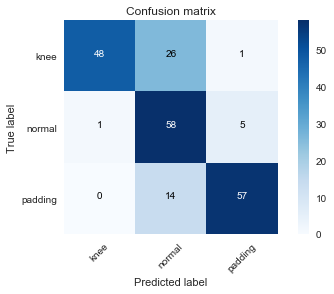

In [47]:
X_train_all, Y_train_all, X_test, y_test = Selection_train_test(X.values, persons_testing)
from sklearn.metrics import confusion_matrix
scaler, X_test = process_and_normalize(X_test, scaler, train = False)
y_test_pred = clf.predict(X_test)
cnt_matrix= confusion_matrix(y_test, y_test_pred)
class_names = ['knee', 'normal', 'padding']
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnt_matrix, classes=class_names, normalize=False, title='Confusion matrix')

In [35]:
y_test_pred = clf.predict(X_test)
print(clf.best_params_)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw final test set accuracy: %f' % (test_accuracy, ))

{'C': 100.0, 'degree': 3}
softmax on raw final test set accuracy: 0.776190


In [ ]:
best_SVM.